In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score,average_precision_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/storage/emulated/0/Download/Automobile ML/Train.csv',index_col=False)
test=pd.read_csv('/storage/emulated/0/Download/Automobile ML/Test.csv',index_col=False)
test_id=test['ID']

In [3]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [4]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 802.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1202 non-null   object
 1   Policy Start Date       1202 non-null   object
 2   Policy End Date         1202 non-null   object
 3   Gender                  1161 non-null   object
 4   Age                     1202 non-null   int64 
 5   First Transaction Date  1202 non-null   object
 6   No_Pol                  1202 non-null   int64 
 7   Car_Category            830 non-null    object
 8   Subject_Car_Colour      505 non-null    object
 9   Subject_Car_Make        954 non-null    object
 10  LGA_Name                546 non-null    object
 11  State                   546 non-null    object
 12  ProductName             1202 non-null   object
dtypes: int64(2), object(11)
memory usage: 70.5+ KB


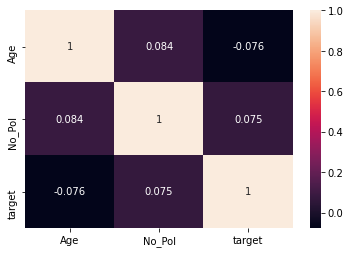

In [7]:
sns.heatmap(train.corr(method='spearman'),annot=True)

In [8]:
target=train.target

In [9]:
data=pd.concat([train.drop('target',axis=1),test],axis=0).drop('ID',axis=1)

In [10]:
data

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic
1,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic
2,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic
3,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe
4,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic
1198,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic
1199,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP
1200,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic


In [11]:
data.isnull().sum()

Policy Start Date            0
Policy End Date              0
Gender                     400
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              4110
Subject_Car_Colour        7659
Subject_Car_Make          2724
LGA_Name                  7132
State                     7144
ProductName                  0
dtype: int64

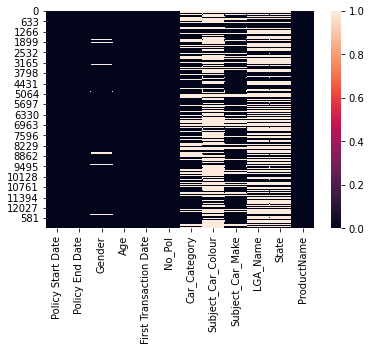

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Policy Start Date       13281 non-null  object
 1   Policy End Date         13281 non-null  object
 2   Gender                  12881 non-null  object
 3   Age                     13281 non-null  int64 
 4   First Transaction Date  13281 non-null  object
 5   No_Pol                  13281 non-null  int64 
 6   Car_Category            9171 non-null   object
 7   Subject_Car_Colour      5622 non-null   object
 8   Subject_Car_Make        10557 non-null  object
 9   LGA_Name                6149 non-null   object
 10  State                   6137 non-null   object
 11  ProductName             13281 non-null  object
dtypes: int64(2), object(10)
memory usage: 830.1+ KB


In [14]:
data.describe()

,Age,No_Pol
count,13281.000000,13281.000000
mean,42.375574,1.302763
std,93.170951,0.723195
min,-6099.000000,1.000000
25%,35.000000,1.000000
50%,41.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


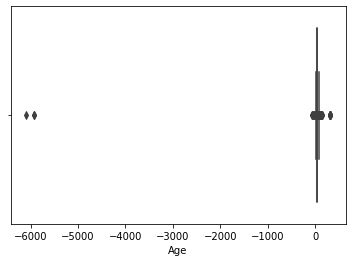

In [15]:
sns.boxplot(x='Age',data=data)

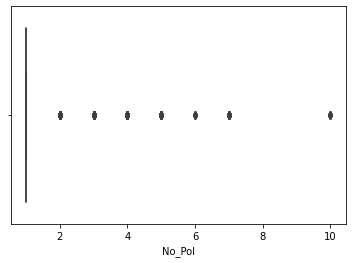

In [16]:
sns.boxplot(x='No_Pol',data=data)

### Handling Datetime Features

In [17]:
data['Policy Start Date']=pd.to_datetime(data['Policy Start Date'])
data['Policy End Date']=pd.to_datetime(data['Policy End Date'])
data['First Transaction Date']=pd.to_datetime(data['First Transaction Date'])

data['Policy Start Year']=data['Policy Start Date'].dt.year
data['Policy Start Month']=data['Policy Start Date'].dt.month
data['Policy Start Day']=data['Policy Start Date'].dt.day

data['Policy End Year']=data['Policy End Date'].dt.year
data['Policy End Month']=data['Policy End Date'].dt.month
data['Policy End Day']=data['Policy End Date'].dt.day

data['First Transaction Year']=data['First Transaction Date'].dt.year
data['First Transaction Month']=data['First Transaction Date'].dt.month
data['First Transaction Day']=data['First Transaction Date'].dt.day


data['Policy Interval']=data['Policy End Date'] - data['Policy Start Date']
data['Policy Interval']=data['Policy Interval'].dt.days.astype('int64')
data.drop(['Policy Start Date','Policy End Date','First Transaction Date'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   12881 non-null  object
 1   Age                      13281 non-null  int64 
 2   No_Pol                   13281 non-null  int64 
 3   Car_Category             9171 non-null   object
 4   Subject_Car_Colour       5622 non-null   object
 5   Subject_Car_Make         10557 non-null  object
 6   LGA_Name                 6149 non-null   object
 7   State                    6137 non-null   object
 8   ProductName              13281 non-null  object
 9   Policy Start Year        13281 non-null  int64 
 10  Policy Start Month       13281 non-null  int64 
 11  Policy Start Day         13281 non-null  int64 
 12  Policy End Year          13281 non-null  int64 
 13  Policy End Month         13281 non-null  int64 
 14  Policy End Day           13281 non-null

In [19]:
data.tail()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy Start Year,Policy Start Month,Policy Start Day,Policy End Year,Policy End Month,Policy End Day,First Transaction Year,First Transaction Month,First Transaction Day,Policy Interval
1197,Male,67,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,2010,12,5,2011,12,4,2010,12,5,364
1198,Male,43,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,2010,1,14,2011,1,13,2010,1,14,364
1199,Male,30,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,2010,7,26,2011,7,25,2010,7,26,364
1200,Male,44,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,2010,2,16,2011,2,15,2010,2,16,364
1201,Male,28,1,Saloon,Silver,TOYOTA,NaN,NaN,Car Classic,2010,3,18,2011,3,17,2010,3,18,364


In [20]:
features=pd.DataFrame(data.columns,columns=['Features'])
features

,Features
0,Gender
1,Age
2,No_Pol
3,Car_Category
4,Subject_Car_Colour
5,Subject_Car_Make
6,LGA_Name
7,State
8,ProductName
9,Policy Start Year


In [21]:
for col in features['Features']:
    print(col,':',data[col].nunique())

Gender : 7
Age : 110
No_Pol : 8
Car_Category : 16
Subject_Car_Colour : 46
Subject_Car_Make : 75
LGA_Name : 270
State : 113
ProductName : 9
Policy Start Year : 8
Policy Start Month : 12
Policy Start Day : 31
Policy End Year : 7
Policy End Month : 12
Policy End Day : 31
First Transaction Year : 8
First Transaction Month : 12
First Transaction Day : 31
Policy Interval : 311


In [22]:
month_map={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
           7:'July',8:'August',9:'September',10:'Octomber',11:'November',12:'December'}

data['Policy Start Month']=data['Policy Start Month'].map(month_map)
data['Policy End Month']=data['Policy End Month'].map(month_map)
data['First Transaction Month']=data['First Transaction Month'].map(month_map)

data

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy Start Year,Policy Start Month,Policy Start Day,Policy End Year,Policy End Month,Policy End Day,First Transaction Year,First Transaction Month,First Transaction Day,Policy Interval
0,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,2010,May,14,2011,May,13,2010,May,14,364
1,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,2010,November,29,2011,November,28,2010,November,29,364
2,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,2010,March,21,2011,March,20,2010,March,21,364
3,Male,2,1,NaN,NaN,NaN,NaN,NaN,CarSafe,2010,August,21,2011,August,20,2010,August,21,364
4,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,2010,August,29,2010,December,31,2010,August,29,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,Male,67,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,2010,December,5,2011,December,4,2010,December,5,364
1198,Male,43,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,2010,January,14,2011,January,13,2010,January,14,364
1199,Male,30,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,2010,July,26,2011,July,25,2010,July,26,364
1200,Male,44,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,2010,February,16,2011,February,15,2010,February,16,364


In [23]:
data.drop(['LGA_Name','State'],axis=1,inplace=True)

In [24]:
data['Gender'].value_counts()

Male            8356
Female          3679
Entity           300
Joint Gender     238
NOT STATED       190
NO GENDER         76
SEX               42
Name: Gender, dtype: int64

In [25]:
#gender_mapping={'Male':0.63,'Female':0.28,'Joint Gender':0.02,'Entity':0.05,'NOT STATED':0.05,'NO GENDER':0.05,'SEX':0.05}
gender_mapping={'Male':0,'Female':1,'Joint Gender':2,'Entity':2,'NOT STATED':2,'NO GENDER':2,'SEX':2}
data['Gender']=data['Gender'].map(gender_mapping)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   12881 non-null  float64
 1   Age                      13281 non-null  int64  
 2   No_Pol                   13281 non-null  int64  
 3   Car_Category             9171 non-null   object 
 4   Subject_Car_Colour       5622 non-null   object 
 5   Subject_Car_Make         10557 non-null  object 
 6   ProductName              13281 non-null  object 
 7   Policy Start Year        13281 non-null  int64  
 8   Policy Start Month       13281 non-null  object 
 9   Policy Start Day         13281 non-null  int64  
 10  Policy End Year          13281 non-null  int64  
 11  Policy End Month         13281 non-null  object 
 12  Policy End Day           13281 non-null  int64  
 13  First Transaction Year   13281 non-null  int64  
 14  First Transaction Month

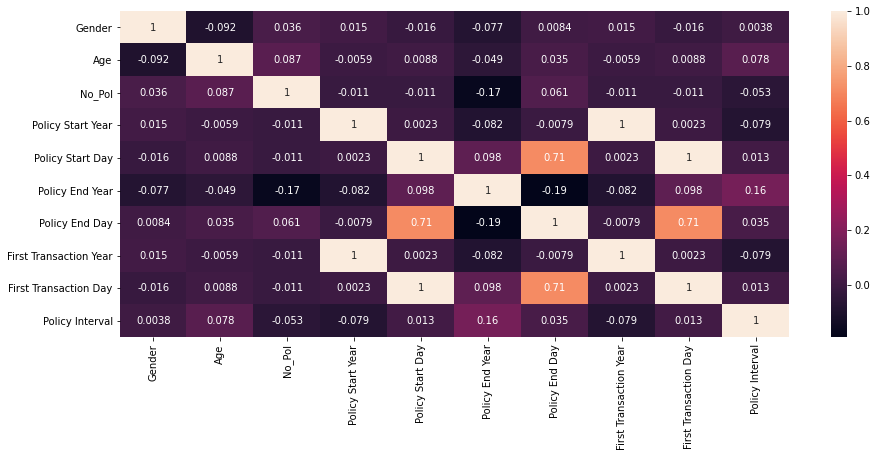

In [27]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(data.corr(method='spearman'),annot=True)

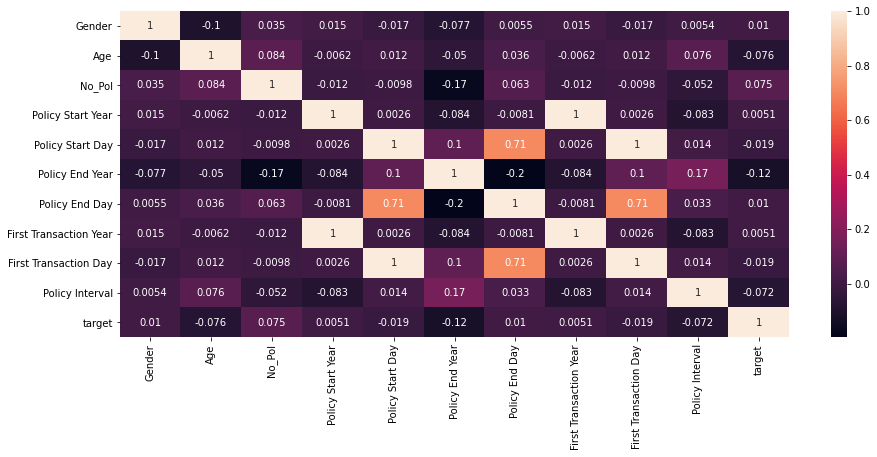

In [28]:
corr_test=pd.concat([data[:train.shape[0]],target],axis=1)
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(corr_test.corr(method='spearman'),annot=True)

In [29]:
for i in ['Subject_Car_Make','Subject_Car_Colour','Car_Category','ProductName']:
    print(data[i].value_counts())

TOYOTA        5466
Honda         1146
Lexus          654
Mercedes       577
Hyundai        512
              ... 
Lincoln          1
Howo             1
CHANGAN          1
Motorcycle       1
Bajaj            1
Name: Subject_Car_Make, Length: 75, dtype: int64
Black             2057
Silver             605
Grey               565
As Attached        555
Blue               398
White              321
Red                274
Green              259
Gold               192
Ash                142
Wine               101
Brown               65
Cream               10
Yellow               8
Dark Gray            7
White & Blue         5
Orange               5
Purple               4
Red & White          4
B.Silver             4
Dark Grey            3
D. Red               3
Light Green          3
Blue & Red           3
Gray & Silver        2
Red & Black          2
Black & Orange       2
Dark Blue            2
Gray & Gray          2
White & Red          2
Black & White        2
Blue&White&Red       1
Blue S

In [30]:
def cat_enc(cat_feat):
    data[cat_feat]=data[cat_feat].map(data[cat_feat].value_counts().to_dict())
    data[cat_feat]=data[cat_feat]/13281

In [31]:
cat_enc('Subject_Car_Make')
cat_enc('Subject_Car_Colour')
cat_enc('Car_Category')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   12881 non-null  float64
 1   Age                      13281 non-null  int64  
 2   No_Pol                   13281 non-null  int64  
 3   Car_Category             9171 non-null   float64
 4   Subject_Car_Colour       5622 non-null   float64
 5   Subject_Car_Make         10557 non-null  float64
 6   ProductName              13281 non-null  object 
 7   Policy Start Year        13281 non-null  int64  
 8   Policy Start Month       13281 non-null  object 
 9   Policy Start Day         13281 non-null  int64  
 10  Policy End Year          13281 non-null  int64  
 11  Policy End Month         13281 non-null  object 
 12  Policy End Day           13281 non-null  int64  
 13  First Transaction Year   13281 non-null  int64  
 14  First Transaction Month

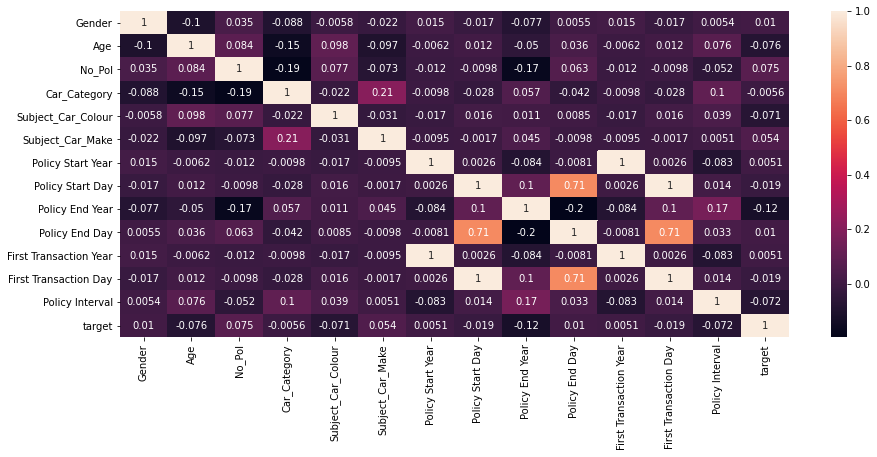

In [33]:
corr_test=pd.concat([data[:train.shape[0]],target],axis=1)
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(corr_test.corr(method='spearman'),annot=True)

In [34]:
product_name_dummies=pd.get_dummies(data['ProductName']).add_prefix('ProductName_')
policy_start_month_dummies=pd.get_dummies(data['Policy Start Month']).add_prefix('Policy_Start_Month_')
policy_end_month_dummies=pd.get_dummies(data['Policy End Month']).add_prefix('Policy_End_Month_')
first_transac_month_dummies=pd.get_dummies(data['First Transaction Month']).add_prefix('First_Transaction_Month_')
data=pd.concat([data,product_name_dummies,policy_start_month_dummies,policy_end_month_dummies,
                first_transac_month_dummies],axis=1).drop(['ProductName','Policy Start Month','Policy End Month','First Transaction Month'],axis=1)

In [35]:
data.shape

(13281, 58)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             12881 non-null  float64
 1   Age                                13281 non-null  int64  
 2   No_Pol                             13281 non-null  int64  
 3   Car_Category                       9171 non-null   float64
 4   Subject_Car_Colour                 5622 non-null   float64
 5   Subject_Car_Make                   10557 non-null  float64
 6   Policy Start Year                  13281 non-null  int64  
 7   Policy Start Day                   13281 non-null  int64  
 8   Policy End Year                    13281 non-null  int64  
 9   Policy End Day                     13281 non-null  int64  
 10  First Transaction Year             13281 non-null  int64  
 11  First Transaction Day              13281 non-null  int6

### Outliers

In [37]:
data.describe()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,Policy Start Year,Policy Start Day,Policy End Year,Policy End Day,...,First_Transaction_Month_December,First_Transaction_Month_February,First_Transaction_Month_January,First_Transaction_Month_July,First_Transaction_Month_June,First_Transaction_Month_March,First_Transaction_Month_May,First_Transaction_Month_November,First_Transaction_Month_Octomber,First_Transaction_Month_September
count,12881.000000,13281.000000,13281.000000,9171.000000,5622.000000,10557.000000,13281.000000,13281.000000,13281.000000,13281.000000,...,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000
mean,0.416971,42.375574,1.302763,0.401947,0.076340,0.232600,2009.996009,16.154506,2010.995783,15.998494,...,0.080867,0.082449,0.096830,0.093743,0.066109,0.088171,0.075823,0.082449,0.084933,0.077329
std,0.611957,93.170951,0.723195,0.160125,0.060614,0.186535,0.153961,8.874429,0.493464,8.963396,...,0.272642,0.275057,0.295737,0.291482,0.248483,0.283554,0.264724,0.275057,0.278793,0.267122
min,0.000000,-6099.000000,1.000000,0.000075,0.000075,0.000075,2001.000000,1.000000,2010.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,1.000000,0.167382,0.024170,0.038551,2010.000000,8.000000,2011.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,41.000000,1.000000,0.499435,0.042542,0.411565,2010.000000,16.000000,2011.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,1.000000,0.499435,0.154883,0.411565,2010.000000,24.000000,2011.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,320.000000,10.000000,0.499435,0.154883,0.411565,2010.000000,31.000000,2041.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Using Z Score

z=(observation-mean)/std

In [38]:
data['Age']=np.abs(data['Age'])

In [39]:
outliers_1=[]
def detect_outliers(feature):
    
    threshold=2
    mean=data[feature].mean()
    std=data[feature].std()
    
    for i in data[feature]:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold:
            outliers_1.append(i)
           
    return outliers_1

In [40]:
age_outlier=detect_outliers('Age')
age_outlier

[320, 6099, 320, 5939, 320, 320, 320, 5939, 320, 320, 320, 320, 320, 320, 320]

In [41]:
data['Age_z_score']=np.abs(data['Age']-data['Age'].mean())/data['Age'].std()

In [42]:
data.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,Policy Start Year,Policy Start Day,Policy End Year,Policy End Day,...,First_Transaction_Month_February,First_Transaction_Month_January,First_Transaction_Month_July,First_Transaction_Month_June,First_Transaction_Month_March,First_Transaction_Month_May,First_Transaction_Month_November,First_Transaction_Month_Octomber,First_Transaction_Month_September,Age_z_score
0,0.0,30,1,0.499435,0.154883,0.411565,2010,14,2011,13,...,0,0,0,0,0,1,0,0,0,0.164905
1,1.0,79,1,0.167382,0.042542,0.411565,2010,29,2011,28,...,0,0,0,0,0,0,1,0,0,0.368519
2,0.0,43,1,0.499435,0.020631,0.411565,2010,21,2011,20,...,0,0,0,0,1,0,0,0,0,0.023385
3,0.0,2,1,NaN,NaN,NaN,2010,21,2011,20,...,0,0,0,0,0,0,0,0,0,0.469719
4,2.0,20,3,NaN,NaN,NaN,2010,29,2010,31,...,0,0,0,0,0,0,0,0,0,0.273767


In [43]:
index=data[data['Age_z_score']>2].index.to_list()

In [44]:
data.shape

(13281, 59)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             12881 non-null  float64
 1   Age                                13281 non-null  int64  
 2   No_Pol                             13281 non-null  int64  
 3   Car_Category                       9171 non-null   float64
 4   Subject_Car_Colour                 5622 non-null   float64
 5   Subject_Car_Make                   10557 non-null  float64
 6   Policy Start Year                  13281 non-null  int64  
 7   Policy Start Day                   13281 non-null  int64  
 8   Policy End Year                    13281 non-null  int64  
 9   Policy End Day                     13281 non-null  int64  
 10  First Transaction Year             13281 non-null  int64  
 11  First Transaction Day              13281 non-null  int6

In [46]:
data.shape

(13281, 59)

In [47]:
data.describe()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,Policy Start Year,Policy Start Day,Policy End Year,Policy End Day,...,First_Transaction_Month_February,First_Transaction_Month_January,First_Transaction_Month_July,First_Transaction_Month_June,First_Transaction_Month_March,First_Transaction_Month_May,First_Transaction_Month_November,First_Transaction_Month_Octomber,First_Transaction_Month_September,Age_z_score
count,12881.000000,13281.000000,13281.000000,9171.000000,5622.000000,10557.000000,13281.000000,13281.000000,13281.000000,13281.000000,...,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000
mean,0.416971,45.148106,1.302763,0.401947,0.076340,0.232600,2009.996009,16.154506,2010.995783,15.998494,...,0.082449,0.096830,0.093743,0.066109,0.088171,0.075823,0.082449,0.084933,0.077329,0.157492
std,0.611957,91.859380,0.723195,0.160125,0.060614,0.186535,0.153961,8.874429,0.493464,8.963396,...,0.275057,0.295737,0.291482,0.248483,0.283554,0.264724,0.275057,0.278793,0.267122,0.987519
min,0.000000,0.000000,1.000000,0.000075,0.000075,0.000075,2001.000000,1.000000,2010.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001612
25%,0.000000,35.000000,1.000000,0.167382,0.024170,0.038551,2010.000000,8.000000,2011.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052819
50%,0.000000,41.000000,1.000000,0.499435,0.042542,0.411565,2010.000000,16.000000,2011.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088702
75%,1.000000,50.000000,1.000000,0.499435,0.154883,0.411565,2010.000000,24.000000,2011.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164905
max,2.000000,6099.000000,10.000000,0.499435,0.154883,0.411565,2010.000000,31.000000,2041.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.903470


In [48]:
new_col=data.columns
imp=SimpleImputer(strategy='mean')
data=data.values
X=imp.fit_transform(data)

data=pd.DataFrame(X,columns=new_col)

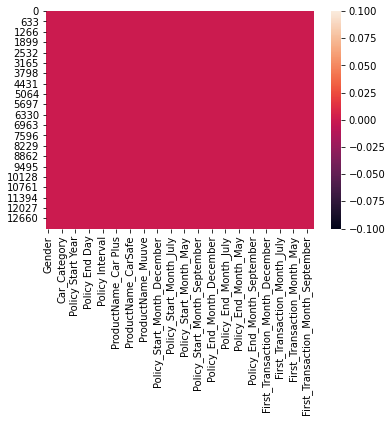

In [49]:
sns.heatmap(data.isnull())

## Dataset Segregation

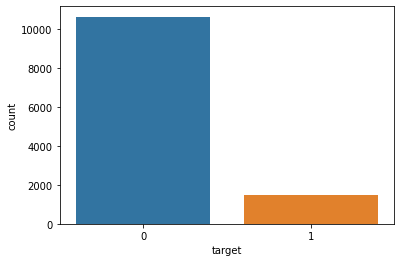

In [50]:
sns.countplot(x='target',data=train)

In [51]:
X=data[:train.shape[0]]
test=data[train.shape[0]:]

In [52]:
data.shape

(13281, 59)

In [53]:
test.shape

(1202, 59)

In [54]:
train.shape

(12079, 14)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,target,stratify=target,random_state=16)

## Logistic Regression Block

In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [57]:
print('Train set score: {}'.format(lr.score(X_train,y_train)))
print('Test set score: {}'.format(lr.score(X_test,y_test)))

Train set score: 0.8764764322772933
Test set score: 0.8771523178807947


In [58]:
pred_lr=lr.predict(X_test)

In [59]:
print('Confusion Matrix\n{}'.format(confusion_matrix(pred_lr,y_test)))

Confusion Matrix
[[2648  363]
 [   8    1]]


In [60]:
print('Classification Report\n{}'.format(classification_report(pred_lr,y_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3011
           1       0.00      0.11      0.01         9

    accuracy                           0.88      3020
   macro avg       0.50      0.50      0.47      3020
weighted avg       0.99      0.88      0.93      3020



## Support Vector Mechanism Block

In [61]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [62]:
print('Train set score: {}'.format(svm.score(X_train,y_train)))
print('Test set score: {}'.format(svm.score(X_test,y_test)))

Train set score: 0.8795672811568606
Test set score: 0.8794701986754967


In [63]:
pred_svm=svm.predict(X_test)

In [64]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_svm,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_svm,y_test)))

Confusion Matrix
[[2656  364]
 [   0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3020
           1       0.00      0.00      0.00         0

    accuracy                           0.88      3020
   macro avg       0.50      0.44      0.47      3020
weighted avg       1.00      0.88      0.94      3020



## Decision Tree Block

In [65]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
print('Train set score: {}'.format(dt.score(X_train,y_train)))
print('Test set score: {}'.format(dt.score(X_test,y_test)))

Train set score: 0.9592670272657026
Test set score: 0.8052980132450331


In [67]:
pred_dt=svm.predict(X_test)

In [68]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_dt,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_dt,y_test)))

Confusion Matrix
[[2656  364]
 [   0    0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3020
           1       0.00      0.00      0.00         0

    accuracy                           0.88      3020
   macro avg       0.50      0.44      0.47      3020
weighted avg       1.00      0.88      0.94      3020



## Random Forest Classifier

In [69]:
class_weight={0:10,1:100}
rf=RandomForestClassifier(random_state=16,class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 10, 1: 100}, random_state=16)

In [70]:
print('Train set score: {}'.format(rf.score(X_train,y_train)))
print('Test set score: {}'.format(rf.score(X_test,y_test)))

Train set score: 0.9587150899657799
Test set score: 0.8549668874172185


In [71]:
pred_rf=rf.predict(X_test)

In [72]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_rf,y_test)))

Confusion Matrix
[[2502  284]
 [ 154   80]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2786
           1       0.22      0.34      0.27       234

    accuracy                           0.85      3020
   macro avg       0.58      0.62      0.59      3020
weighted avg       0.89      0.85      0.87      3020



## Ada Boost Classifier

In [73]:
ad=AdaBoostClassifier(random_state=16)
ad.fit(X_train,y_train)

AdaBoostClassifier(random_state=16)

In [74]:
print('Train set score: {}'.format(ad.score(X_train,y_train)))
print('Test set score: {}'.format(ad.score(X_test,y_test)))

Train set score: 0.8833204547963351
Test set score: 0.8794701986754967


In [75]:
pred_ad=ad.predict(X_test)

In [76]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_ad,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_ad,y_test)))

Confusion Matrix
[[2639  347]
 [  17   17]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      2986
           1       0.05      0.50      0.09        34

    accuracy                           0.88      3020
   macro avg       0.52      0.69      0.51      3020
weighted avg       0.98      0.88      0.93      3020



## Gradient Boosting Classifier

In [77]:
gb=GradientBoostingClassifier(random_state=16)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=16)

In [78]:
print('Train set score: {}'.format(gb.score(X_train,y_train)))
print('Test set score: {}'.format(gb.score(X_test,y_test)))

Train set score: 0.8866320785958716
Test set score: 0.8807947019867549


In [79]:
pred_gb=gb.predict(X_test)

In [80]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_gb,y_test)))

Confusion Matrix
[[2641  345]
 [  15   19]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.94      2986
           1       0.05      0.56      0.10        34

    accuracy                           0.88      3020
   macro avg       0.52      0.72      0.52      3020
weighted avg       0.98      0.88      0.93      3020



### MLP Classifier Block

In [81]:
nn=MLPClassifier(random_state=16)
nn.fit(X_train,y_train)

MLPClassifier(random_state=16)

In [82]:
print('Train set score: {}'.format(nn.score(X_train,y_train)))
print('Test set score: {}'.format(nn.score(X_test,y_test)))

Train set score: 0.8827685174964124
Test set score: 0.878476821192053


In [83]:
pred_nn=nn.predict(X_test)

In [84]:
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_nn,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_nn,y_test)))

Confusion Matrix
[[2636  347]
 [  20   17]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2983
           1       0.05      0.46      0.08        37

    accuracy                           0.88      3020
   macro avg       0.52      0.67      0.51      3020
weighted avg       0.98      0.88      0.92      3020



## Undersampling

In [85]:
count_class_0,count_class_1=train.target.value_counts()

In [86]:
df_class_0=train[train['target']==0]
df_class_1=train[train['target']==1]

In [87]:
print('Majority Class Shape: {}'.format(df_class_0.shape))
print('Minority Class Shape: {}'.format(df_class_1.shape))

Majority Class Shape: (10624, 14)
Minority Class Shape: (1455, 14)


In [88]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [89]:
ns=NearMiss(0.3)
X_train_under,y_train_under=ns.fit_sample(X_train,y_train)
X_test_under,y_test_under=ns.fit_sample(X_test,y_test)
print('The number of classes in train set before fit: {}'.format(Counter(y_train)))
print('The number of classes in train set after fit: {}\n'.format(Counter(y_train_under)))


print('The number of classes in test set before fit: {}'.format(Counter(y_test)))
print('The number of classes in test set after fit: {}'.format(Counter(y_test_under)))

The number of classes in train set before fit: Counter({0: 7968, 1: 1091})
The number of classes in train set after fit: Counter({0: 3636, 1: 1091})

The number of classes in test set before fit: Counter({0: 2656, 1: 364})
The number of classes in test set after fit: Counter({0: 1213, 1: 364})


In [90]:
lr=LogisticRegression()
lr.fit(X_train_under,y_train_under)

LogisticRegression()

In [91]:
print('Train set score: {}'.format(lr.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(lr.score(X_test_under,y_test_under)))

Train set score: 0.8011423735984768
Test set score: 0.8161065313887127


In [92]:
pred_lr=lr.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_lr,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_lr,y_test_under)))

Confusion Matrix
[[1198  275]
 [  15   89]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1473
           1       0.24      0.86      0.38       104

    accuracy                           0.82      1577
   macro avg       0.62      0.83      0.64      1577
weighted avg       0.94      0.82      0.86      1577



In [93]:
svm=SVC()
svm.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(svm.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(svm.score(X_test_under,y_test_under)))

pred_svm=svm.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_svm,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_svm,y_test_under)))

Train set score: 0.7770255976306325
Test set score: 0.7812301838934687
Confusion Matrix
[[1213  345]
 [   0   19]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1558
           1       0.05      1.00      0.10        19

    accuracy                           0.78      1577
   macro avg       0.53      0.89      0.49      1577
weighted avg       0.99      0.78      0.87      1577



In [94]:
dt=DecisionTreeClassifier()
dt.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(dt.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(dt.score(X_test_under,y_test_under)))

pred_dt=dt.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_dt,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_dt,y_test_under)))

Train set score: 0.9367463507510049
Test set score: 0.7704502219403931
Confusion Matrix
[[1046  195]
 [ 167  169]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1241
           1       0.46      0.50      0.48       336

    accuracy                           0.77      1577
   macro avg       0.66      0.67      0.67      1577
weighted avg       0.78      0.77      0.77      1577



In [95]:
rf=RandomForestClassifier(random_state=16,max_depth=7,n_estimators=500)
rf.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(rf.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(rf.score(X_test_under,y_test_under)))

pred_rf=rf.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_rf,y_test_under)))

Train set score: 0.8313941188914745
Test set score: 0.8363982244768547
Confusion Matrix
[[1199  244]
 [  14  120]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1443
           1       0.33      0.90      0.48       134

    accuracy                           0.84      1577
   macro avg       0.66      0.86      0.69      1577
weighted avg       0.93      0.84      0.87      1577



In [96]:
ad=AdaBoostClassifier(random_state=16)
ad.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(ad.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(ad.score(X_test_under,y_test_under)))

pred_ad=ad.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_ad,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_ad,y_test_under)))

Train set score: 0.8282208588957055
Test set score: 0.8389346861128726
Confusion Matrix
[[1188  229]
 [  25  135]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1417
           1       0.37      0.84      0.52       160

    accuracy                           0.84      1577
   macro avg       0.68      0.84      0.71      1577
weighted avg       0.92      0.84      0.86      1577



In [97]:
gb=GradientBoostingClassifier(random_state=16)
gb.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(gb.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(gb.score(X_test_under,y_test_under)))

pred_gb=gb.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_gb,y_test_under)))

Train set score: 0.8400676962132431
Test set score: 0.8509828788839569
Confusion Matrix
[[1198  220]
 [  15  144]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1418
           1       0.40      0.91      0.55       159

    accuracy                           0.85      1577
   macro avg       0.69      0.88      0.73      1577
weighted avg       0.93      0.85      0.87      1577



In [98]:
nn=MLPClassifier(random_state=16)
nn.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(nn.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(nn.score(X_test_under,y_test_under)))

pred_nn=nn.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_nn,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_nn,y_test_under)))

Train set score: 0.7986037656018616
Test set score: 0.8091312618896639
Confusion Matrix
[[1211  299]
 [   2   65]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1510
           1       0.18      0.97      0.30        67

    accuracy                           0.81      1577
   macro avg       0.59      0.89      0.60      1577
weighted avg       0.96      0.81      0.86      1577



### Undersampling Submission

In [99]:
ss=pd.read_csv('/storage/emulated/0/Download/Automobile ML/Samplesubmission.csv',index_col=False)

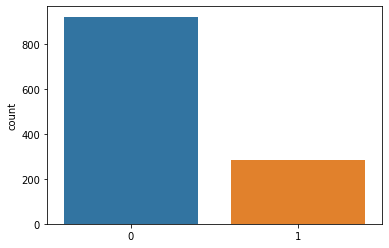

In [100]:
# Make prediction on the test set
predictions = gb.predict(test)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);

In [101]:
#sub_file.to_csv('Baseline.csv', index = False)

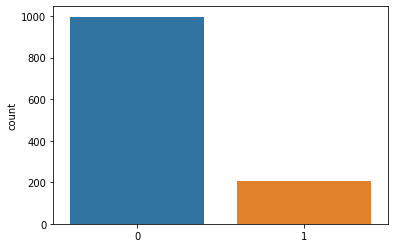

In [102]:
# Make prediction on the test set
predictions = rf.predict(test)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);

In [103]:
#sub_file.to_csv('Baseline2.csv', index = False)

### Tuning

In [104]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=16)

In [105]:
class_weight={0:0.2,1:0.4}
rf=RandomForestClassifier(random_state=16,class_weight=class_weight)
params={'n_estimators':[100,300,500],'max_depth':[5,7,11]}
rf_clf=GridSearchCV(rf,params,cv=kfold,n_jobs=-1)
rf_clf.fit(X_train_under,y_train_under)

print('Train set score: {}'.format(rf_clf.score(X_train_under,y_train_under)))
print('Test set score: {}'.format(rf_clf.score(X_test_under,y_test_under)))

pred_rf_clf=rf_clf.predict(X_test_under)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf_clf,y_test_under)))
print('Classification Report\n{}'.format(classification_report(pred_rf_clf,y_test_under)))

Train set score: 0.8339327268880897
Test set score: 0.8478123018389346
Confusion Matrix
[[1191  218]
 [  22  146]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1409
           1       0.40      0.87      0.55       168

    accuracy                           0.85      1577
   macro avg       0.69      0.86      0.73      1577
weighted avg       0.92      0.85      0.87      1577



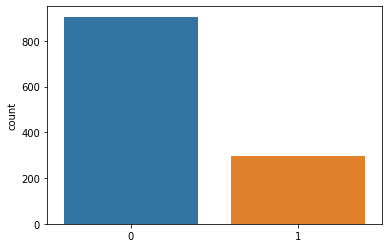

In [106]:
# Make prediction on the test set
predictions = rf_clf.predict(test)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions)

In [107]:
#sub_file.to_csv('under_tuning_rf.csv', index = False)

In [108]:
#gb=GradientBoostingClassifier(random_state=16)
#params={'n_estimators':[100,300,500],'max_depth':[5,7,11],'learning_rate':[0.5,0.8,1.1]}
#gb_clf=GridSearchCV(gb,params,cv=kfold,n_jobs=-1)
#gb_clf.fit(X_train_under,y_train_under)

#print('Train set score: {}'.format(gb_clf.score(X_train_under,y_train_under)))
#print('Test set score: {}'.format(gb_clf.score(X_test_under,y_test_under)))

#pred_gb_clf=gb_clf.predict(X_test_under)
#print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb_clf,y_test_under)))
#print('Classification Report\n{}'.format(classification_report(pred_gb_clf,y_test_under)))

In [109]:
# Make prediction on the test set
#predictions = gb_clf.predict(test)

# Create a submission file
#sub_file = ss.copy()
#sub_file.predictions = predictions

# Check the distribution of your predictions
#sns.countplot(sub_file.predictions)

In [110]:
#sub_file.to_csv('under_tuning_gb_2.csv', index = False)

## Oversampling

In [111]:
from imblearn.over_sampling import RandomOverSampler

In [112]:
os=RandomOverSampler(1)
X_train_over,y_train_over=os.fit_sample(X_train,y_train)
X_test_over,y_test_over=os.fit_sample(X_test,y_test)
print('The number of classes in train set before fit: {}'.format(Counter(y_train)))
print('The number of classes in train set after fit: {}\n'.format(Counter(y_train_over)))


print('The number of classes in test set before fit: {}'.format(Counter(y_test)))
print('The number of classes in test set after fit: {}'.format(Counter(y_test_over)))

The number of classes in train set before fit: Counter({0: 7968, 1: 1091})
The number of classes in train set after fit: Counter({0: 7968, 1: 7968})

The number of classes in test set before fit: Counter({0: 2656, 1: 364})
The number of classes in test set after fit: Counter({1: 2656, 0: 2656})


In [113]:
lr=LogisticRegression(max_iter=1000,C=10000)
lr.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(lr.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(lr.score(X_test_over,y_test_over)))

pred_lr=lr.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_lr,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_lr,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_lr)

Train set score: 0.6959713855421686
Test set score: 0.6812876506024096
Confusion Matrix
[[1374  411]
 [1282 2245]]

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.77      0.62      1785
           1       0.85      0.64      0.73      3527

    accuracy                           0.68      5312
   macro avg       0.68      0.70      0.67      5312
weighted avg       0.74      0.68      0.69      5312



0.7261846999838266

In [114]:
svm=SVC(C=1000,gamma=0.001)
svm.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(svm.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(svm.score(X_test_over,y_test_over)))

pred_svm=svm.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_svm,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_svm,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_svm)

Train set score: 0.8246736947791165
Test set score: 0.6566265060240963
Confusion Matrix
[[1737  905]
 [ 919 1751]]

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      2642
           1       0.66      0.66      0.66      2670

    accuracy                           0.66      5312
   macro avg       0.66      0.66      0.66      5312
weighted avg       0.66      0.66      0.66      5312



0.6575291025159594

In [115]:
nn=MLPClassifier(alpha=0.001,max_iter=10000)
nn.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(nn.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(nn.score(X_test_over,y_test_over)))

pred_nn=nn.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_nn,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_nn,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_nn)

Train set score: 0.6895707831325302
Test set score: 0.6799698795180723
Confusion Matrix
[[1147  191]
 [1509 2465]]

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.86      0.57      1338
           1       0.93      0.62      0.74      3974

    accuracy                           0.68      5312
   macro avg       0.68      0.74      0.66      5312
weighted avg       0.80      0.68      0.70      5312



0.7435897435897436

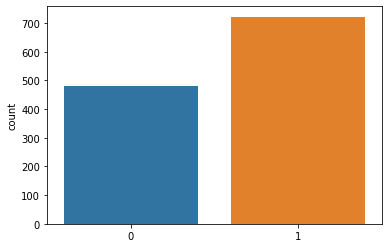

In [116]:
# Make prediction on the test set
predictions = nn.predict(test)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions);

In [117]:
#sub_file.to_csv('MLP over_sampling.csv', index = False)

In [118]:
dt=DecisionTreeClassifier(random_state=16)
dt.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(dt.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(dt.score(X_test_over,y_test_over)))

pred_dt=dt.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_dt,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_dt,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_dt)

Train set score: 0.976593875502008
Test set score: 0.5707831325301205
Confusion Matrix
[[2277 1901]
 [ 379  755]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.54      0.67      4178
           1       0.28      0.67      0.40      1134

    accuracy                           0.57      5312
   macro avg       0.57      0.61      0.53      5312
weighted avg       0.73      0.57      0.61      5312



0.39841688654353563

In [119]:
class_weight={0:0.3,1:0.1}
rf=RandomForestClassifier(random_state=16,n_estimators=220,max_depth=5)
rf.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(rf.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(rf.score(X_test_over,y_test_over)))

pred_rf=rf.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_rf,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_rf)

Train set score: 0.7424698795180723
Test set score: 0.7283509036144579
Confusion Matrix
[[1535  322]
 [1121 2334]]

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1857
           1       0.88      0.68      0.76      3455

    accuracy                           0.73      5312
   macro avg       0.73      0.75      0.72      5312
weighted avg       0.77      0.73      0.73      5312



0.7638684339715268

In [120]:
ad=AdaBoostClassifier(random_state=16)
ad.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(ad.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(ad.score(X_test_over,y_test_over)))

pred_ad=ad.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_ad,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_ad,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_ad)

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_ad)

Train set score: 0.7399598393574297
Test set score: 0.7078313253012049
Confusion Matrix
[[1677  573]
 [ 979 2083]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      2250
           1       0.78      0.68      0.73      3062

    accuracy                           0.71      5312
   macro avg       0.71      0.71      0.71      5312
weighted avg       0.72      0.71      0.71      5312



0.7285764253235397

In [121]:
gb=GradientBoostingClassifier(random_state=16)
gb.fit(X_train_over,y_train_over)

print('Train set score: {}'.format(gb.score(X_train_over,y_train_over)))
print('Test set score: {}'.format(gb.score(X_test_over,y_test_over)))

pred_gb=gb.predict(X_test_over)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb,y_test_over)))
print('Classification Report\n{}'.format(classification_report(pred_gb,y_test_over)))

from sklearn.metrics import f1_score
f1_score(y_test_over,pred_gb)

Train set score: 0.7732806224899599
Test set score: 0.7411521084337349
Confusion Matrix
[[1661  380]
 [ 995 2276]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      2041
           1       0.86      0.70      0.77      3271

    accuracy                           0.74      5312
   macro avg       0.74      0.75      0.74      5312
weighted avg       0.77      0.74      0.74      5312



0.7680107980428547

## Creating Pipeline

In [122]:
target.shape

(12079,)

In [123]:
train=pd.concat([data[:train.shape[0]],target],axis=1)

count_class_0,count_class_1=train.target.value_counts()
df_class_0=train[train['target']==0]
df_class_1=train[train['target']==1]
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_over=pd.concat([df_class_1_over,df_class_0],axis=0)

print('Majority Class Shape:{}'.format(df_class_0.shape))
print('Minority Class Shape:{}'.format(df_class_1.shape))
print('Minority Class Shape After Oversampling:{}'.format(df_class_1_over.shape))

Majority Class Shape:(10624, 60)
Minority Class Shape:(1455, 60)
Minority Class Shape After Oversampling:(10624, 60)


In [124]:
df_over

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,Policy Start Year,Policy Start Day,Policy End Year,Policy End Day,...,First_Transaction_Month_January,First_Transaction_Month_July,First_Transaction_Month_June,First_Transaction_Month_March,First_Transaction_Month_May,First_Transaction_Month_November,First_Transaction_Month_Octomber,First_Transaction_Month_September,Age_z_score,target
3403,1.000000,1.0,1.0,0.499435,0.029968,0.411565,2010.0,25.0,2011.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.480605,1
7561,0.416971,120.0,4.0,0.401947,0.076340,0.232600,2010.0,16.0,2010.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.814853,1
8376,0.000000,50.0,3.0,0.499435,0.076340,0.038551,2010.0,18.0,2011.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.052819,1
5158,1.000000,35.0,1.0,0.499435,0.014457,0.411565,2010.0,18.0,2011.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110474,1
5030,0.000000,65.0,1.0,0.499435,0.154883,0.411565,2010.0,22.0,2011.0,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.216112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,1.000000,31.0,1.0,0.499435,0.000753,0.038551,2010.0,8.0,2011.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154019,0
12075,1.000000,59.0,1.0,0.401947,0.076340,0.232600,2010.0,3.0,2011.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.150795,0
12076,0.000000,34.0,1.0,0.401947,0.076340,0.232600,2010.0,10.0,2011.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121361,0
12077,0.416971,120.0,2.0,0.401947,0.024170,0.411565,2010.0,27.0,2011.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814853,0


In [125]:
X=df_over.drop('target',axis=1)
y=df_over.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16,stratify=y)

In [126]:
pipe_nn=Pipeline([('scaler',StandardScaler()),('nn',MLPClassifier(random_state=16,max_iter=10000,alpha=0.001))])
pipe_nn.fit(X_train,y_train)

print('Train set score: {}'.format(pipe_nn.score(X_train,y_train)))
print('Test set score: {}'.format(pipe_nn.score(X_test,y_test)))

pred_nn=pipe_nn.predict(X_test)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_nn,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_nn,y_test)))

from sklearn.metrics import f1_score
f1_score(y_test,pred_nn)

Train set score: 0.8888679718875502
Test set score: 0.8429969879518072
Confusion Matrix
[[2107  285]
 [ 549 2371]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2392
           1       0.89      0.81      0.85      2920

    accuracy                           0.84      5312
   macro avg       0.84      0.85      0.84      5312
weighted avg       0.85      0.84      0.84      5312



0.8504304160688666

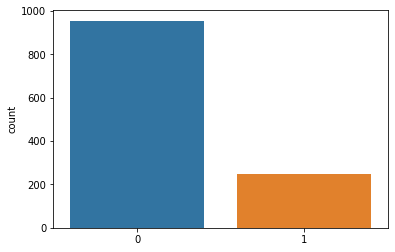

In [127]:
# Make prediction on the test set
predictions = pipe_nn.predict(test)

# Create a submission file
sub_file = ss.copy()
sub_file.predictions = predictions

# Check the distribution of your predictions
sns.countplot(sub_file.predictions)

In [128]:
#sub_file.to_csv('MLP over_sampling_3.csv', index = False)

In [129]:
pipe_dt=Pipeline([('scaler',StandardScaler()),('dt',DecisionTreeClassifier(random_state=16,max_depth=17))])
pipe_dt.fit(X_train,y_train)

print('Train set score: {}'.format(pipe_dt.score(X_train,y_train)))
print('Test set score: {}'.format(pipe_dt.score(X_test,y_test)))

pred_dt=pipe_dt.predict(X_test)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_dt,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_dt,y_test)))

from sklearn.metrics import f1_score
f1_score(y_test,pred_dt)

Train set score: 0.8888679718875502
Test set score: 0.8450677710843374
Confusion Matrix
[[1939  106]
 [ 717 2550]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      2045
           1       0.96      0.78      0.86      3267

    accuracy                           0.85      5312
   macro avg       0.85      0.86      0.84      5312
weighted avg       0.87      0.85      0.85      5312



0.8610501435083573

In [ ]:
pipe_rf=Pipeline([('scaler',MinMaxScaler()),('rf',RandomForestClassifier(random_state=16,max_depth=11,n_estimators=320))])
pipe_rf.fit(X_train,y_train)

print('Train set score: {}'.format(pipe_rf.score(X_train,y_train)))
print('Test set score: {}'.format(pipe_rf.score(X_test,y_test)))

pred_rf=pipe_rf.predict(X_test)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_rf,y_test)))

from sklearn.metrics import f1_score
f1_score(y_test,pred_rf)

In [131]:
pipe_gb=Pipeline([('scaler',MinMaxScaler()),('gb',GradientBoostingClassifier(random_state=16,max_depth=11,n_estimators=320,learning_rate=0.8))])
pipe_gb.fit(X_train,y_train)

print('Train set score: {}'.format(pipe_gb.score(X_train,y_train)))
print('Test set score: {}'.format(pipe_gb.score(X_test,y_test)))

pred_gb=pipe_gb.predict(X_test)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_gb,y_test)))

from sklearn.metrics import f1_score
f1_score(y_test,pred_gb)

Train set score: 0.9698795180722891
Test set score: 0.953125
Confusion Matrix
[[2445   38]
 [ 211 2618]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2483
           1       0.99      0.93      0.95      2829

    accuracy                           0.95      5312
   macro avg       0.95      0.96      0.95      5312
weighted avg       0.96      0.95      0.95      5312



0.9546034639927075

### 0.328 submission

In [132]:
# Make prediction on the test set
#predictions = pipe_gb.predict(test)

# Create a submission file
#sub_file = ss.copy()
#sub_file.target = predictions

# Check the distribution of your predictions
#sns.countplot(sub_file.target)

In [133]:
#sub_file.to_csv('Gradient_scaled_2.csv', index = False)

### Cross validation on gradient boosting scaled

In [134]:
#kfold=StratifiedKFold(random_state=16,shuffle=True,n_splits=5)
#model=GradientBoostingClassifier(random_state=16,max_depth=11,n_estimators=320,learning_rate=0.8)
#score=cross_val_score(model,X,y,cv=kfold,scoring='f1')

In [135]:
#print('Cross validation scores: {}'.format(score))
#print('Average cross validation scores: {}'.format(score.mean()))

In [136]:
#gb_pipe=Pipeline([('scaler',MinMaxScaler()),('gb',GradientBoostingClassifier(random_state=16,max_depth=11,n_estimators=320,learning_rate=0.8))])
#scores=cross_val_score(gb_pipe,X,y,cv=kfold,scoring='f1')

In [137]:
#print('Cross validation scores: {}'.format(scores))
#print('Average cross validation scores: {}'.format(scores.mean()))

### Hyperparameter Tuning

In [138]:
#gb_pipe=Pipeline([('scaler',MinMaxScaler()),('gb',GradientBoostingClassifier(random_state=16))])
#params={'gb__n_estimators':[250,320,400],'gb__max_depth':[5,7,11],'gb__learning_rate':np.arange(0.4,1,0.15)}
#clf=GridSearchCV(gb_pipe,params,cv=kfold,scoring='f1',n_jobs=-1)
#clf.fit(X_train,y_train)
#result=pd.DataFrame(clf.cv_results_)

In [139]:
#result

In [140]:
#clf.best_params_

In [141]:
#clf.best_score_

In [142]:
#pipe_gb=Pipeline([('scaler',MinMaxScaler()),('gb',GradientBoostingClassifier(random_state=16,max_depth=11,n_estimators=320,learning_rate=0.4))])
#pipe_gb.fit(X_train,y_train)

#print('Train set score: {}'.format(pipe_gb.score(X_train,y_train)))
#print('Test set score: {}'.format(pipe_gb.score(X_test,y_test)))

#pred_gb=pipe_gb.predict(X_test)
#print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_gb,y_test)))
#print('Classification Report\n{}'.format(classification_report(pred_gb,y_test)))

#from sklearn.metrics import f1_score
#f1_score(y_test,pred_gb)

### 0.3218 Submission

In [143]:
pipe_rf=Pipeline([('scaler',MinMaxScaler()),('rf',RandomForestClassifier(random_state=16,n_estimators=200))])
pipe_rf.fit(X_train,y_train)

print('Train set score: {}'.format(pipe_rf.score(X_train,y_train)))
print('Test set score: {}'.format(pipe_rf.score(X_test,y_test)))

pred_rf=pipe_rf.predict(X_test)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(pred_rf,y_test)))
print('Classification Report\n{}'.format(classification_report(pred_rf,y_test)))

from sklearn.metrics import f1_score
f1_score(y_test,pred_rf)

Train set score: 0.9698795180722891
Test set score: 0.9418298192771084
Confusion Matrix
[[2381   34]
 [ 275 2622]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2415
           1       0.99      0.91      0.94      2897

    accuracy                           0.94      5312
   macro avg       0.94      0.95      0.94      5312
weighted avg       0.95      0.94      0.94      5312



0.9443544030253918

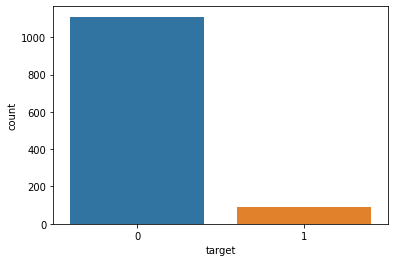

In [144]:
predictions = pipe_rf.predict(test)

sub_file = ss.copy()
sub_file.target = predictions

sns.countplot(sub_file.target)

In [145]:
sub_file.to_csv('RandomForest.csv', index = False)

### Smote Technique

In [146]:
from imblearn.combine import SMOTETomek

In [154]:
X=data[:train.shape[0]]
y=target

In [155]:
X.shape

(12079, 59)

In [156]:
y.shape

(12079,)

In [160]:
data.shape

(13281, 59)

In [164]:
st=SMOTETomek(0.75)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=16,stratify=y)

X_train_st,y_train_st=st.fit_sample(X_train,y_train)
print('Train Set')
print('The number of classes before SMOTE fitting: {}'.format(Counter(y_train)))
print('The number of classes after SMOTE fitting: {}'.format(Counter(y_train_st)))

X_test_st,y_test_st=st.fit_sample(X_test,y_test)
print('Test Set')
print('The number of classes before SMOTE fitting: {}'.format(Counter(y_test)))
print('The number of classes after SMOTE fitting: {}'.format(Counter(y_test_st)))

Train Set
The number of classes before SMOTE fitting: Counter({0: 7968, 1: 1091})
The number of classes after SMOTE fitting: Counter({0: 7907, 1: 5915})
Test Set
The number of classes before SMOTE fitting: Counter({0: 2656, 1: 364})
The number of classes after SMOTE fitting: Counter({0: 2613, 1: 1949})


In [177]:
dt=Pipeline([('scaler',MinMaxScaler()),('rf',DecisionTreeClassifier(max_depth=11,random_state=16))])
dt.fit(X_train_st,y_train_st)
dt_pred=dt.predict(X_test_st)

print('Train set score: {}'.format(dt.score(X_train_st,y_train_st)))
print('Test set score: {}'.format(dt.score(X_test_st,y_test_st)))

p_dt=dt.predict(X_test_st)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(p_dt,y_test_st)))
print('Classification Report\n{}'.format(classification_report(p_dt,y_test_st)))

from sklearn.metrics import f1_score
f1_score(y_test_st,p_dt)

Train set score: 0.9029807553176096
Test set score: 0.871766768960982
Confusion Matrix
[[2382  354]
 [ 231 1595]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2736
           1       0.82      0.87      0.85      1826

    accuracy                           0.87      4562
   macro avg       0.86      0.87      0.87      4562
weighted avg       0.87      0.87      0.87      4562



0.8450331125827815

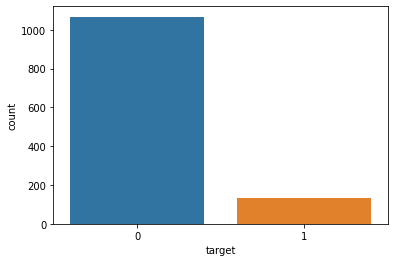

In [180]:
predictions = dt.predict(test)

sub_file = ss.copy()
sub_file.target = predictions

sns.countplot(sub_file.target)

sub_file.to_csv('smote_dt.csv', index = False)

In [187]:
rf=Pipeline([('scaler',MinMaxScaler()),('rf',RandomForestClassifier(n_estimators=520,max_depth=13,random_state=16))])
rf.fit(X_train_st,y_train_st)
rf_pred=rf.predict(X_test_st)

print('Train set score: {}'.format(rf.score(X_train_st,y_train_st)))
print('Test set score: {}'.format(rf.score(X_test_st,y_test_st)))

p_rf=rf.predict(X_test_st)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(p_rf,y_test_st)))
print('Classification Report\n{}'.format(classification_report(p_rf,y_test_st)))

from sklearn.metrics import f1_score
f1_score(y_test_st,p_rf)

Train set score: 0.9419042106786283
Test set score: 0.8982902235861464
Confusion Matrix
[[2485  336]
 [ 128 1613]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2821
           1       0.83      0.93      0.87      1741

    accuracy                           0.90      4562
   macro avg       0.89      0.90      0.89      4562
weighted avg       0.90      0.90      0.90      4562



0.8742547425474254

In [188]:
gb=Pipeline([('scaler',MinMaxScaler()),('rf',GradientBoostingClassifier(n_estimators=520,max_depth=11,learning_rate=0.8
                                                                        ,random_state=16))])
gb.fit(X_train_st,y_train_st)
gb_pred=gb.predict(X_test_st)

print('Train set score: {}'.format(gb.score(X_train_st,y_train_st)))
print('Test set score: {}'.format(gb.score(X_test_st,y_test_st)))

p_gb=gb.predict(X_test_st)
print('Confusion Matrix\n{}\n'.format(confusion_matrix(p_gb,y_test_st)))
print('Classification Report\n{}'.format(classification_report(p_gb,y_test_st)))

from sklearn.metrics import f1_score
f1_score(y_test_st,p_gb)

Train set score: 0.9733034293155839
Test set score: 0.8796580447172293
Confusion Matrix
[[2445  381]
 [ 168 1568]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2826
           1       0.80      0.90      0.85      1736

    accuracy                           0.88      4562
   macro avg       0.87      0.88      0.88      4562
weighted avg       0.89      0.88      0.88      4562



NameError: name 'p_hn' is not defined